<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/d1_Copy_of_Copy_of_Concrete_Data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
concrete_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro-to-KERAS/concrete_data.csv', encoding='ISO-8859-1')

In [4]:
#sns.pairplot(concrete_df)

In [5]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:

X = concrete_df.drop(['Strength'], axis = 1)


In [7]:
Y=concrete_df['Strength']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [9]:

input_shape=X_train.shape[1]

In [10]:
X_train.shape

(721, 8)

In [11]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()


In [12]:
model = regression_model()

In [13]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 3849.4663 - mse: 3849.4663 - val_loss: 1359.3248 - val_mse: 1359.3248 - 672ms/epoch - 42ms/step
Epoch 2/50
16/16 - 0s - loss: 673.9235 - mse: 673.9235 - val_loss: 190.5397 - val_mse: 190.5397 - 51ms/epoch - 3ms/step
Epoch 3/50
16/16 - 0s - loss: 265.7094 - mse: 265.7094 - val_loss: 247.8354 - val_mse: 247.8354 - 65ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 246.6332 - mse: 246.6332 - val_loss: 179.3692 - val_mse: 179.3692 - 53ms/epoch - 3ms/step
Epoch 5/50
16/16 - 0s - loss: 203.0462 - mse: 203.0462 - val_loss: 159.6083 - val_mse: 159.6083 - 70ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 177.3988 - mse: 177.3988 - val_loss: 155.3817 - val_mse: 155.3817 - 52ms/epoch - 3ms/step
Epoch 7/50
16/16 - 0s - loss: 165.0684 - mse: 165.0684 - val_loss: 149.6413 - val_mse: 149.6413 - 50ms/epoch - 3ms/step
Epoch 8/50
16/16 - 0s - loss: 161.3033 - mse: 161.3033 - val_loss: 152.4006 - val_mse: 152.4006 - 63ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 159.

In [14]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


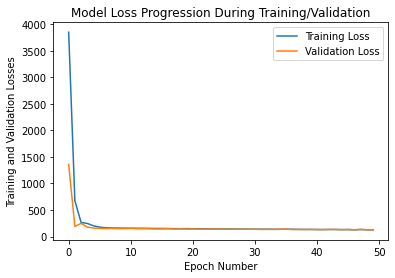

In [15]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

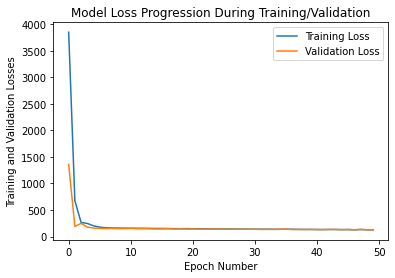

In [16]:
plt.plot(epochs_hist.history['mse'])
plt.plot(epochs_hist.history['val_mse'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [17]:
y_pred = model.predict(X_test)

In [18]:
from keras.losses import mean_squared_error

In [19]:
result = np.sqrt(mean_squared_error(y_test,y_pred))
result

array([28.777977, 20.410456, 25.295963, 20.169348, 19.011   , 17.532104,
       17.04662 , 16.455622, 20.118305, 16.817745, 19.401566, 21.451035,
       28.245703, 23.534485, 17.564623, 19.531895, 16.628439, 16.99884 ,
       16.815712, 16.71023 , 16.53718 , 18.282084, 16.452585, 17.336348,
       17.288359, 18.00851 , 24.316   , 16.948896, 16.732862, 20.045778,
       16.53646 , 16.657133, 20.90169 , 16.596966, 16.943182, 17.035927,
       20.30437 , 17.03487 , 21.346521, 16.550592, 22.62662 , 24.302736,
       17.188435, 19.467539, 20.262321, 24.440329, 21.29109 , 23.542307,
       21.026993, 20.363888, 17.874445, 16.548717, 18.075617, 16.502176,
       22.498945, 20.731937, 20.981436, 23.953207, 18.715809, 22.912634,
       16.992016, 19.37122 , 16.582268, 20.696756, 18.642906, 20.102468,
       16.530107, 23.832428, 18.354702, 18.302141, 22.427183, 21.372513,
       26.502972, 19.418821, 17.28948 , 22.032923, 29.320154, 16.471973,
       32.808365, 20.644293, 16.67058 , 19.3169  , 

In [20]:
from keras.losses import mean_squared_error

create a list of 50 mean squared errors

In [21]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [32.34048  24.572155 33.761276 24.23977  22.458797 17.790207 17.369776
 19.909985 16.815441 17.480583 16.851746 19.508896 35.993145 25.029816
 16.67475  19.931698 16.74414  17.122889 16.449982 16.454655 17.080254
 16.513494 17.095669 17.573952 16.477386 16.467585 23.239767 18.582369
 18.89054  19.173193 17.032627 16.48315  20.23963  20.903292 16.532022
 16.491413 16.919243 17.60496  20.143162 17.50001  19.217583 23.0417
 16.489477 23.052322 19.979193 28.66665  23.869802 32.824974 20.005205
 20.325516 18.03039  16.9992   16.573772 16.493698 21.481411 24.028803
 17.21143  22.018564 16.584068 20.549528 17.531015 19.671005 16.454731
 27.094336 18.42268  18.871569 16.46591  21.769762 17.96228  17.62014
 21.671469 20.78899  24.477036 16.862307 16.797682 20.696043 32.71062
 20.012358 25.840452 18.618692 19.643562 21.452312 16.449205 17.026094
 40.24296  24.23977  16.55711  16.480139 17.254705 19.303793 16.98269
 31.111765 18.209957 18.550215 17.906994 23.157757 16.94073  16.847

A. Results
Report mean square MSE and std square MSE

In [22]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(MSE_List)
std_sqmse_A  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,20.083986,4.068915


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PART-B  -NORMALIZE THE DATA,EPOCHS-50,ONE HIDDEN  LAYER OF 10 NODES.

In [24]:
X = concrete_df.drop(['Strength'], axis = 1)

In [25]:
Y=concrete_df['Strength']

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
X=scaler.fit_transform(X)

In [29]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

train_test_split WITH test_size=0.3

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [31]:
model = regression_model()

In [32]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0121 - val_mse: 0.0121 - 967ms/epoch - 60ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 57ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0119 - val_mse: 0.0119 - 67ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 74ms/epoch - 5ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 55ms/epoch - 3ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 70ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 70ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 57ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 56ms/epoch -

create a list of 50 mean squared errors.

In [33]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [18.209894 16.618212 17.562061 16.599663 16.46461  16.456375 16.464207
 17.125624 16.526083 16.488134 16.48045  17.099258 18.157295 16.677326
 16.478163 16.47352  16.450787 16.728088 16.475447 16.534817 16.491632
 16.47996  16.641273 16.729826 16.460848 16.635828 16.782589 16.451801
 17.346619 17.041452 16.490232 16.759745 16.464014 17.287903 16.494081
 16.6521   16.48486  16.479004 16.968561 16.795425 16.725925 17.149366
 16.457449 17.077246 16.449514 16.848898 17.20764  17.974178 16.762508
 16.859257 16.476534 16.46207  16.49394  16.532461 16.494125 16.55529
 16.487467 16.8089   16.719952 16.664688 16.470734 17.673637 16.746323
 16.922682 16.713554 16.488552 16.45122  16.472786 16.469187 16.474823
 17.228388 16.823261 17.141289 16.480738 16.457075 16.472452 18.168966
 17.098677 16.645649 16.492514 17.081335 16.497408 16.53816  16.476772
 18.610607 16.599663 16.481165 16.459373 16.497288 16.451164 16.643147
 17.018381 16.459743 16.449518 16.457829 17.140516 16.482735 16


B. Results Report mean square MSE and std square MSE

In [34]:
mean_sqmse_B = np.mean(MSE_List)
std_sqmse_B  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["B"],"mean_sq_mse": [mean_sqmse_B], "std_sq_mse": [std_sqmse_B]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,B,16.707376,0.417421


COMPARISON OF A ND B RESULTS

COMPARISON OF  A- EPOCHS-50, B  -EPOCHS-50(Normalized)

In [35]:
Results = pd.DataFrame.from_dict({"Part": ["A","B"],"TYPE": ["EPOCHS-50","EPOCHS-50(Normalized)"],"LAYER":["ONE DENSE LAYER WITH 10 NODES","ONE DENSE LAYER WITH 10 NODES"]
                                 , "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B],"hidden Layer-Activation":["Relu","Relu"]})
Results

,Part,TYPE,LAYER,mean_sq_mse,std_sq_mse,hidden Layer-Activation
0,A,EPOCHS-50,ONE DENSE LAYER WITH 10 NODES,20.083986,4.068915,Relu
1,B,EPOCHS-50(Normalized),ONE DENSE LAYER WITH 10 NODES,16.707376,0.417421,Relu



PART-C-NORMALIZED WITH EPOCHS=100,ONE HIDDEN LAYER WITH 10 NODES

In [36]:
X = concrete_df.drop(['Strength'], axis = 1)

In [37]:
Y=concrete_df['Strength']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [39]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

train_test_split WITH test_size=0.3

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [41]:
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()

In [42]:
model=regression_model()

MODEL FITTING WITH 100 EPOCHS AND VALIDATION_SPLIT=0.3

In [43]:
epochs_hist = model.fit(X_train, y_train, epochs=100,  verbose=2, validation_split=0.3)

Epoch 1/100
16/16 - 1s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0124 - val_mse: 0.0124 - 618ms/epoch - 39ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0122 - val_mse: 0.0122 - 63ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0121 - val_mse: 0.0121 - 55ms/epoch - 3ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0120 - val_mse: 0.0120 - 66ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 55ms/epoch - 3ms/step
Epoch 6/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 57ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 58ms/epoch - 4ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 65ms/epoch - 4ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0119 - val_mse: 0.0119 - 73m

create a list of 50 mean squared errors.

In [44]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=100, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [21.062294 18.06047  21.322144 17.983206 17.135305 16.545502 16.579657
 17.223505 16.44941  16.501919 16.451578 17.204136 23.655056 18.299244
 16.702597 16.610023 16.501493 16.584198 16.520916 16.455027 16.45984
 16.663939 16.631058 16.613432 16.481585 16.546467 17.312607 16.803623
 16.772608 16.983791 16.450974 16.528015 16.912079 17.07762  16.478306
 16.458242 16.470768 16.586145 16.94222  16.642422 16.884634 17.276869
 16.456709 17.782648 16.859716 18.956564 17.90656  20.389578 16.787447
 16.885124 16.680172 16.49997  16.492998 16.452955 16.651752 17.843998
 16.466503 17.24132  16.45097  16.95231  16.561779 17.405296 16.473108
 19.298582 16.65376  16.62892  16.461582 16.988117 16.48276  16.553677
 17.261145 16.867462 17.4669   16.45143  16.554392 16.857298 21.050465
 17.311777 17.14852  16.53403  17.689222 17.611214 16.449371 16.452936
 22.523947 17.983206 16.456026 16.453524 16.537376 16.753323 16.61727
 19.36541  16.748808 17.050142 16.502289 18.608547 16.587788 16.


C. Results Report mean square MSE and std square MSE

In [45]:
mean_sqmse_C= np.mean(MSE_List)
std_sqmse_C = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["C"],"mean_sq_mse": [mean_sqmse_C], "std_sq_mse": [std_sqmse_C]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,C,17.260675,1.455441


COMPARISON OF B AND C mean and the standard deviation of the mean squared errors.( EPOCHS-50(Normalized)","EPOCHS-100(Normalized))

In [46]:
Results = pd.DataFrame.from_dict({"Part": ["B","C"],"TYPE":["EPOCHS-50(Normalized)","EPOCHS-100(Normalized)"],"hidden-LAYER":["ONE DENSE LAYER WITH 10 NODES","ONE DENSE LAYER WITH 10 NODES"],
                                 "hidden Layer-Activation":["Relu","Relu"], "mean_sq_mse": [ mean_sqmse_B,mean_sqmse_C], 
                                  "std_sq_mse": [ std_sqmse_B,std_sqmse_C]})
Results

,Part,TYPE,hidden-LAYER,hidden Layer-Activation,mean_sq_mse,std_sq_mse
0,B,EPOCHS-50(Normalized),ONE DENSE LAYER WITH 10 NODES,Relu,16.707376,0.417421
1,C,EPOCHS-100(Normalized),ONE DENSE LAYER WITH 10 NODES,Relu,17.260675,1.455441


PART-D ..NORMALIZE DATA ,EPOCH=50,WITH HIDDEN LAYERS 3,EACH 10 NODES


In [47]:
X = concrete_df.drop(['Strength'], axis = 1)

In [48]:
Y=concrete_df['Strength']

NORMALIZATION OF THE DATA

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [50]:
X=scaler.fit_transform(X)

In [51]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [53]:
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))
  model.add(Dense(10))
  model.add(Dense(10))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()

In [54]:
model=regression_model()

MODEL FITTING WITH 50 EPOCHS AND VALIDATION_SPLIT=0.3

In [55]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0119 - val_mse: 0.0119 - 708ms/epoch - 44ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 63ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 68ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 71ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 65ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 72ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 59ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 73ms/epoch - 5ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 59ms/epoch -

create a list of 50 mean squared errors.

In [56]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [29.24665  23.312086 35.199226 23.026642 21.980253 17.166813 18.169012
 18.618824 17.16435  16.754093 16.602346 21.004036 42.439613 23.35407
 18.27212  16.944109 16.87165  18.046375 16.468561 16.986187 16.45792
 18.85436  16.641947 18.94462  16.558392 16.45047  23.868237 18.133944
 17.39151  19.638485 16.44949  16.73882  17.594395 18.86201  17.317207
 16.597927 17.58608  17.24791  21.902071 16.847622 20.513056 24.479528
 17.14518  21.92622  21.271387 26.45672  24.825039 28.744936 20.431997
 21.6723   17.368166 16.450468 16.791014 17.044695 18.267227 22.499445
 17.622126 23.21379  16.972263 21.788244 17.139973 19.793276 16.85089
 28.424185 19.451982 18.463018 16.474676 21.59171  18.720394 18.467112
 21.624828 21.701012 23.587605 16.60741  17.493923 21.88048  29.872095
 19.334839 22.135462 20.82352  17.011677 21.14671  16.58296  17.3344
 35.919624 23.026642 16.449314 16.508068 18.261662 20.5827   17.793198
 28.803244 19.607182 18.509113 16.990278 20.997211 18.042065 17.158

D. Results Report mean square MSE and std square MSE

In [57]:
mean_sqmse_D = np.mean(MSE_List)
std_sqmse_D  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["D"],"mean_sq_mse": [mean_sqmse_D], "std_sq_mse": [std_sqmse_D]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,D,19.841135,4.253186


COMPARISION OF A,B,D--(EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS)FOR THEIR MEAN AND STD OF MEAN SQAURED ERRORS)


In [58]:
Results = pd.DataFrame.from_dict({"Part": ["A","B","D"],"TYPE": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS"],
           "hidden Layer-Activation":["Relu","Relu","Relu"],"hidden-LAYER":["ONE DENSE LAYER WITH 10 NODES","ONE DENSE LAYER WITH 10 NODES","three DENSE LAYER WITH 10 NODES"],
                          "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B,mean_sqmse_D], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B,std_sqmse_D]})
Results

,Part,TYPE,hidden Layer-Activation,hidden-LAYER,mean_sq_mse,std_sq_mse
0,A,EPOCHS-50,Relu,ONE DENSE LAYER WITH 10 NODES,20.083986,4.068915
1,B,EPOCHS-50(Normalized),Relu,ONE DENSE LAYER WITH 10 NODES,16.707376,0.417421
2,D,EPOCHS-50(Normalized)-3-HIDDEN-LAYERS,Relu,three DENSE LAYER WITH 10 NODES,19.841135,4.253186


COMPARISON OF A,B,C,D--( (EPOCHS-50,EPOCHS-50(Normalized),EPOCHS-50(Normalized)-3-HIDDEN-LAYERS),EPOCHS 100,NORMALIZED)FOR THEIR MEAN AND STD OF MEAN SQAURED ERRORS)

In [59]:
Results = pd.DataFrame.from_dict({"Part": ["A","B","C","D"],"TYPE": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-100(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS"],
    "TYPE": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-100(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS"],
           "hidden Layer-Activation":["Relu","Relu","Relu","Relu"],"hidden-LAYER":["ONE DENSE LAYER WITH 10 NODES","ONE DENSE LAYER WITH 10 NODES","ONE DENSE LAYER WITH 10 NODES","three DENSE LAYER WITH 10 NODES"],      "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B,mean_sqmse_C,mean_sqmse_D], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B,std_sqmse_C,std_sqmse_D]})
Results

,Part,TYPE,hidden Layer-Activation,hidden-LAYER,mean_sq_mse,std_sq_mse
0,A,EPOCHS-50,Relu,ONE DENSE LAYER WITH 10 NODES,20.083986,4.068915
1,B,EPOCHS-50(Normalized),Relu,ONE DENSE LAYER WITH 10 NODES,16.707376,0.417421
2,C,EPOCHS-100(Normalized),Relu,ONE DENSE LAYER WITH 10 NODES,17.260675,1.455441
3,D,EPOCHS-50(Normalized)-3-HIDDEN-LAYERS,Relu,three DENSE LAYER WITH 10 NODES,19.841135,4.253186
